# pysolar for Cle Elum Ridge

### Notebook contents 
* calculating potential solar radiation to understand net energy at Cle Elum Ridge between WY2021 and WY2023

created by Cassie Lumbrazo\
date: October 2023\
python environment: **pysolar**
- created for pysolar specifically

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
from pysolar.solar import *
import numpy as np
import datetime as dt

/home/lumbraca/mambaforge/envs/pysolar/lib/python3.12/site-packages/pysolar/radiation.py:50: RuntimeWarning: overflow encountered in exp
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime
/home/lumbraca/mambaforge/envs/pysolar/lib/python3.12/site-packages/pysolar/radiation.py:50: RuntimeWarning: invalid value encountered in scalar multiply
  return flux * math.exp(-1 * optical_depth * air_mass_ratio) * is_daytime


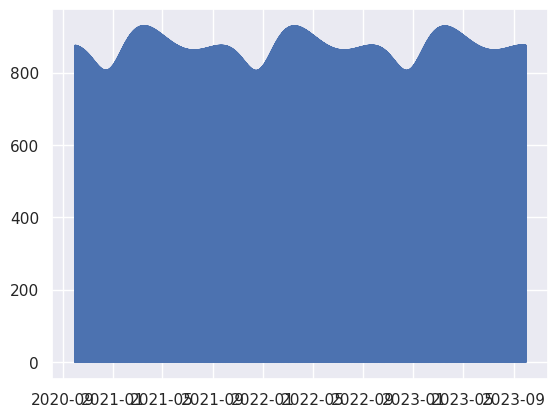

In [3]:
# %%
def clear_sky_radiation(latitude_deg, longitude_deg, date):
    altitude_deg = get_altitude(latitude_deg, longitude_deg, date)
    clear_sky_rad = radiation.get_radiation_direct(date, altitude_deg)
    return clear_sky_rad

# %%
latitude_deg = 47.22
longitude_deg = -120.9
dates = np.arange(dt.datetime(2020,10,1)  , dt.datetime(2023,10,1)  , dt.timedelta(hours=1)).astype(dt.datetime)

dates = dates
csr = []

for date in dates:
    date = date.replace(tzinfo=dt.timezone.utc)
    csr.append(clear_sky_radiation(latitude_deg,longitude_deg, date))


# %%
import matplotlib.pyplot as plt

plt.plot(dates, csr)

Add potential radiation from pysolar to a dataframe to use it later

In [4]:
# create dataframe and add pysolar data and dates
pysolar_df = pd.DataFrame()
pysolar_df['datetime']=dates
pysolar_df['pysolar']=csr

# convert to datetime and drop extra columns
pysolar_df.index = pd.DatetimeIndex(pysolar_df['datetime'])
pysolar_df = pysolar_df.drop(columns=['datetime'])
pysolar_df

,pysolar
datetime,
2020-10-01 00:00:00,613.695003
2020-10-01 01:00:00,248.786175
2020-10-01 02:00:00,0.000000
2020-10-01 03:00:00,0.000000
2020-10-01 04:00:00,0.000000
...,...
2023-09-30 19:00:00,867.308298
2023-09-30 20:00:00,874.332808
2023-09-30 21:00:00,863.083969


Clean a little

In [6]:
pysolar_df.pysolar.mask(pysolar_df.pysolar < 0.0, 0, inplace=True)
pysolar_df.pysolar.mask(pysolar_df.pysolar > 3000, inplace=True) 
pysolar_df = pysolar_df.round(0)

In [7]:
pysolar_df.head()

,pysolar
datetime,
2020-10-01 00:00:00,614.0
2020-10-01 01:00:00,249.0
2020-10-01 02:00:00,0.0
2020-10-01 03:00:00,0.0
2020-10-01 04:00:00,0.0


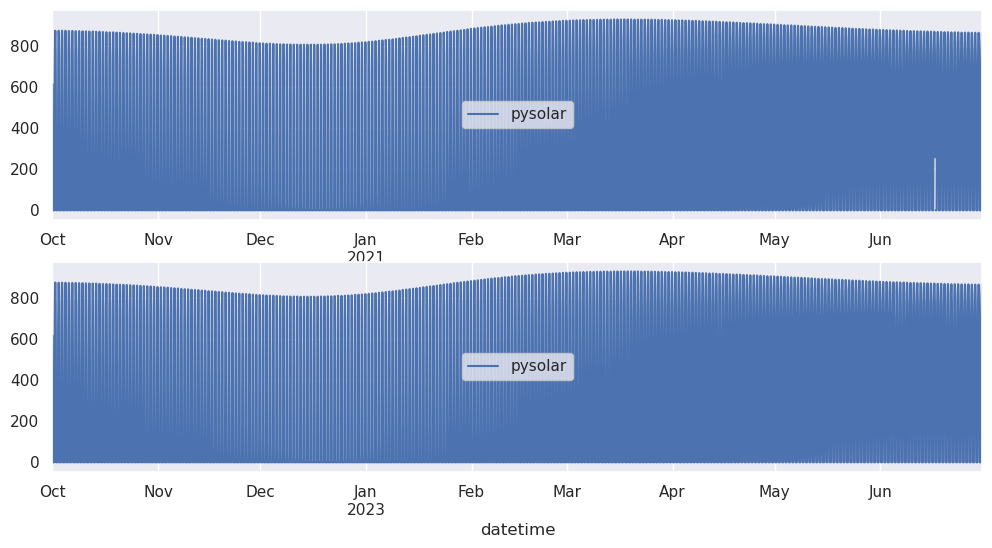

In [10]:
# plot from Ocotber 2020 to June 2021 and from October 2022 to June 2023
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
pysolar_df['2020-10-01':'2021-06-30'].plot(ax=axes[0])
pysolar_df['2022-10-01':'2023-06-30'].plot(ax=axes[1])

plt.show()

Since I am interested to show the difference in net radiation between ~March and April, I want just plot that timezone

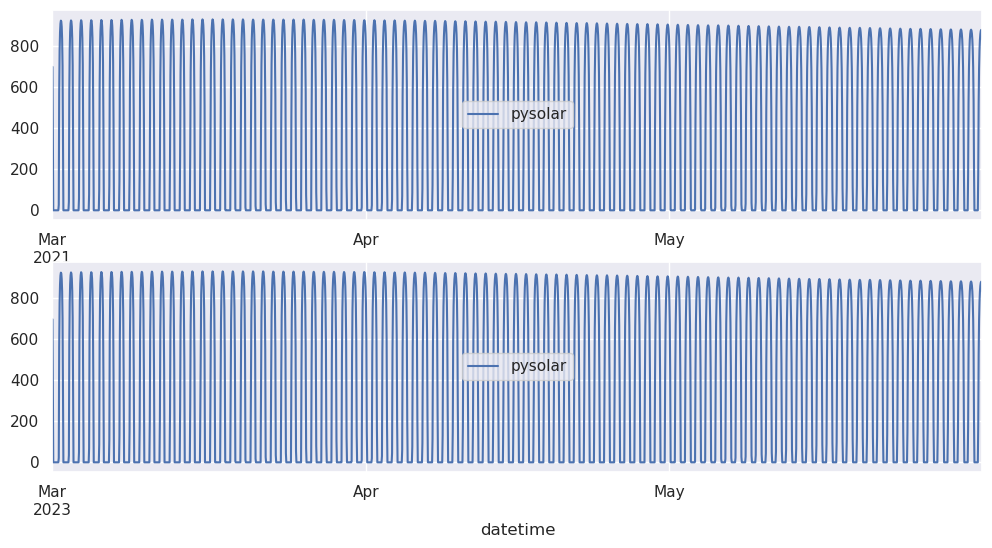

In [14]:
# plot from March 2021 to May 2021 and March 2023 to May 2023
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
pysolar_df['2021-03-01':'2021-05-31'].plot(ax=axes[0])
pysolar_df['2023-03-01':'2023-05-31'].plot(ax=axes[1])
plt.show()

In [15]:
# create a separate dataframe for water year 2023 from October 2022 to June 2023
pysolar_df_2023 = pysolar_df['2022-10-01':'2023-06-30']
pysolar_df_2023.head()

,pysolar
datetime,
2022-10-01 00:00:00,616.0
2022-10-01 01:00:00,257.0
2022-10-01 02:00:00,0.0
2022-10-01 03:00:00,0.0
2022-10-01 04:00:00,0.0


In [42]:
import matplotlib.dates as mdates

In [70]:
pysolar_df.index

DatetimeIndex(['2020-10-01 00:00:00', '2020-10-01 01:00:00',
               '2020-10-01 02:00:00', '2020-10-01 03:00:00',
               '2020-10-01 04:00:00', '2020-10-01 05:00:00',
               '2020-10-01 06:00:00', '2020-10-01 07:00:00',
               '2020-10-01 08:00:00', '2020-10-01 09:00:00',
               ...
               '2023-09-30 14:00:00', '2023-09-30 15:00:00',
               '2023-09-30 16:00:00', '2023-09-30 17:00:00',
               '2023-09-30 18:00:00', '2023-09-30 19:00:00',
               '2023-09-30 20:00:00', '2023-09-30 21:00:00',
               '2023-09-30 22:00:00', '2023-09-30 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=26280, freq=None)

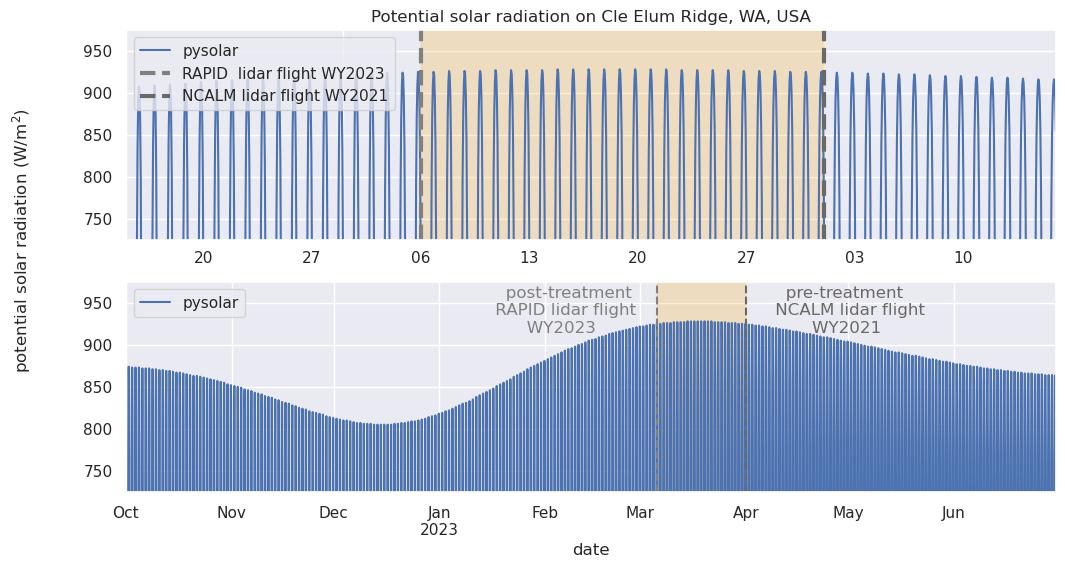

In [98]:
# zoom the yaxis to see the variation in the data
# pysolar_df_2023.plot(ylim=[700, 1000])

# make two subplots, but make the second one half the size of the first 
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), sharex=False, sharey=False)
pysolar_df['2023-02-15':'2023-04-15'].plot(ax=axes[0],)# lable='potential solar radiation')
pysolar_df['2022-10-01':'2023-06-30'].plot(ax=axes[1],)# lable='potential solar radiation')

# add a vertical line to show the start of the irrigation season
axes[0].axvspan('2023-03-06', '2023-04-01', alpha=0.2, color='orange')
axes[1].axvspan('2023-03-06', '2023-04-01', alpha=0.2, color='orange')

# plot vertical lines for the lidar data events
width = 3
axes[0].axvline('2023-03-06', color='grey', linestyle='--', linewidth=width,    label='RAPID  lidar flight WY2023')
axes[0].axvline('2023-04-01', color='dimgrey', linestyle='--', linewidth=width, label='NCALM lidar flight WY2021')
axes[1].axvline('2023-03-06', color='grey', linestyle='--')
axes[1].axvline('2023-04-01', color='dimgrey', linestyle='--')

axes[0].set_ylim([725, 975])
axes[1].set_ylim([725, 975])
axes[0].set_xlabel('')

# center the ylabel between the two y axes
axes[0].set_ylabel('potential solar radiation (W/m$^2$)')
axes[0].yaxis.set_label_coords(-0.1, 0)

# axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%d'))
axes[1].set_xlabel('date')
# axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

axes[0].set_title('Potential solar radiation on Cle Elum Ridge, WA, USA', fontsize=12)

axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')

# remove the legend from the first subplot
# axes[0].get_legend().remove()

# add legend labels for the lidar flight lines to the second subplot
axes[1].text('2023-01-16', 915, '   post-treatment\n RAPID lidar flight\n       WY2023', color='grey')
axes[1].text('2023-04-08', 915, '   pre-treatment\n NCALM lidar flight\n        WY2021', color='dimgrey')

plt.show()


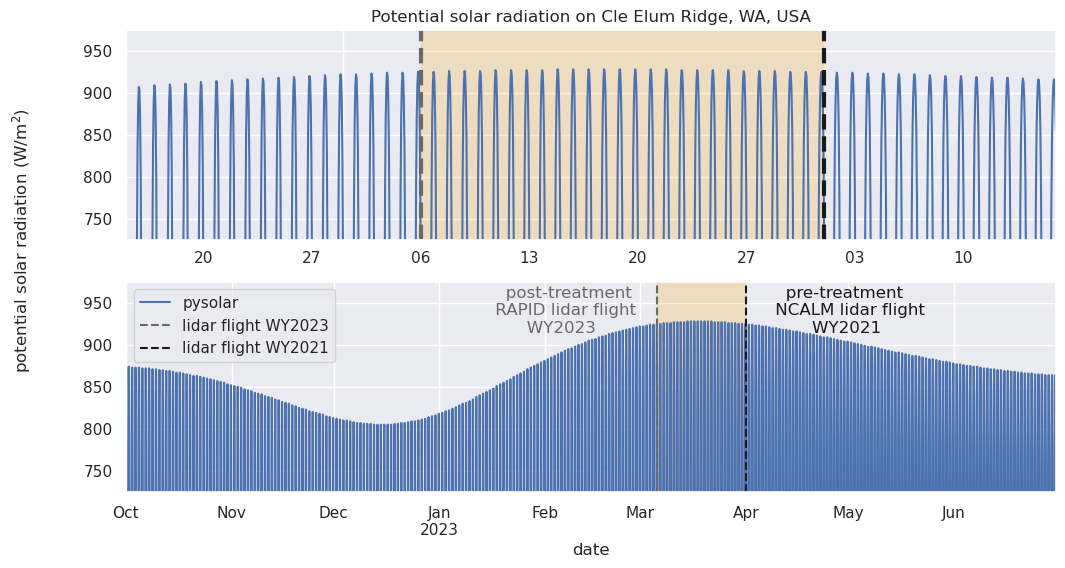

In [104]:
# zoom the yaxis to see the variation in the data
# pysolar_df_2023.plot(ylim=[700, 1000])

# make two subplots, but make the second one half the size of the first 
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), sharex=False, sharey=False)
pysolar_df['2023-02-15':'2023-04-15'].plot(ax=axes[0],)# lable='potential solar radiation')
pysolar_df['2022-10-01':'2023-06-30'].plot(ax=axes[1],)# lable='potential solar radiation')

# add a vertical line to show the start of the irrigation season
axes[0].axvspan('2023-03-06', '2023-04-01', alpha=0.2, color='orange')
axes[1].axvspan('2023-03-06', '2023-04-01', alpha=0.2, color='orange')

# plot vertical lines for the lidar data events
width = 3
axes[0].axvline('2023-03-06', color='dimgrey', linestyle='--', linewidth=width)
axes[0].axvline('2023-04-01', color='k', linestyle='--', linewidth=width)
axes[1].axvline('2023-03-06', color='dimgrey', linestyle='--',    label='lidar flight WY2023')
axes[1].axvline('2023-04-01', color='k', linestyle='--', label='lidar flight WY2021')

axes[0].set_ylim([725, 975])
axes[1].set_ylim([725, 975])
axes[0].set_xlabel('')

# center the ylabel between the two y axes
axes[0].set_ylabel('potential solar radiation (W/m$^2$)')
axes[0].yaxis.set_label_coords(-0.1, 0)

# axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%d'))
axes[1].set_xlabel('date')
# axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

axes[0].set_title('Potential solar radiation on Cle Elum Ridge, WA, USA', fontsize=12)

# axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')

# remove the legend from the first subplot
axes[0].get_legend().remove()

# add legend labels for the lidar flight lines to the second subplot
axes[1].text('2023-01-16', 915, '   post-treatment\n RAPID lidar flight\n       WY2023', color='dimgrey')
axes[1].text('2023-04-08', 915, '   pre-treatment\n NCALM lidar flight\n        WY2021', color='k')

plt.show()


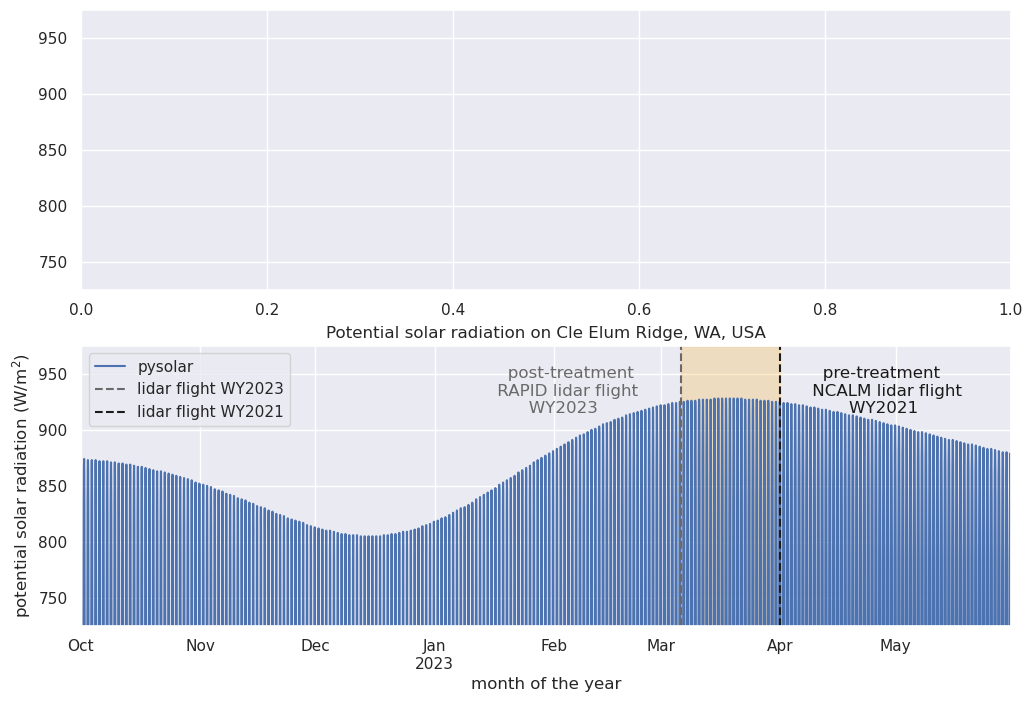

In [138]:
# make two subplots, but make the second one half the size of the first 
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=False, sharey=False)
# pysolar_df['2023-02-15':'2023-04-15'].plot(ax=axes[0],)# lable='potential solar radiation')
pysolar_df['2022-10-01':'2023-05-30'].plot(ax=axes[1],)# lable='potential solar radiation')

# add a vertical line to show the start of the irrigation season
# axes[0].axvspan('2023-03-06', '2023-04-01', alpha=0.2, color='orange')
axes[1].axvspan('2023-03-06', '2023-04-01', alpha=0.2, color='orange')

# plot vertical lines for the lidar data events
width = 3
# axes[0].axvline('2023-03-06', color='dimgrey', linestyle='--', linewidth=width)
# axes[0].axvline('2023-04-01', color='k', linestyle='--', linewidth=width)
axes[1].axvline('2023-03-06', color='dimgrey', linestyle='--',    label='lidar flight WY2023')
axes[1].axvline('2023-04-01', color='k', linestyle='--', label='lidar flight WY2021')

axes[0].set_ylim([725, 975])
axes[1].set_ylim([725, 975])
axes[0].set_xlabel('')

# center the ylabel between the two y axes
axes[1].set_ylabel('potential solar radiation (W/m$^2$)')
# axes[0].yaxis.set_label_coords(-0.1, 0)

# axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%d'))
axes[1].set_xlabel('month of the year')
# axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

axes[1].set_title('Potential solar radiation on Cle Elum Ridge, WA, USA', fontsize=12)

# axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')

# remove the legend from the first subplot
# axes[0].get_legend().remove()

# add legend labels for the lidar flight lines to the second subplot
axes[1].text('2023-01-16', 915, '   post-treatment\n RAPID lidar flight\n       WY2023', color='dimgrey')
axes[1].text('2023-04-08', 915, '   pre-treatment\n NCALM lidar flight\n        WY2021', color='k')

plt.show()
